# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
    Wine Quality Dataset (UCI Machine Learning Repository)

    Dataset ini berisi informasi tentang kualitas wine Vinho Verde dari Portugal, terdiri dari dua jenis wine: merah dan putih.
    Tujuan dari dataset ini adalah untuk memprediksi kualitas wine berdasarkan tes fisikokimia.

    Sumber: https://archive.ics.uci.edu/dataset/186/wine+quality

    Informasi fitur:
    1. fixed acidity - keasaman tetap
    2. volatile acidity - keasaman yang mudah menguap
    3. citric acid - asam sitrat
    4. residual sugar - gula residu
    5. chlorides - klorida
    6. free sulfur dioxide - sulfur dioksida bebas
    7. total sulfur dioxide - total sulfur dioksida
    8. density - densitas
    9. pH - tingkat keasaman
    10. sulphates - sulfat
    11. alcohol - alkohol

    Target:
      - quality - skor kualitas wine (antara 0 dan 10)

    Fitur tambahan:
      - color - warna wine (merah atau putih)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
!pip install ucimlrepo

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
import os
from ucimlrepo import fetch_ucirepo

# Mengabaikan warning yang tidak perlu
warnings.filterwarnings('ignore')

# Mengatur style untuk visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [5]:
wine_quality = fetch_ucirepo(id=186)

# Data features (X) dan target (y)
X = wine_quality.data.features
y = wine_quality.data.targets

print("\nMetadata dataset:")
print(wine_quality.metadata)


Metadata dataset:
{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeli

In [6]:
print("\nInformasi variabel:")
print(wine_quality.variables)


Informasi variabel:
                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1         

In [7]:
data = pd.concat([X, y], axis=1)
print("\nInformasi dataset:")
data.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [10]:
print("\nUkuran dataset:", data.shape)
print(data.head())


Ukuran dataset: (6497, 12)
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [12]:
print("\n---- Statistik Deskriptif ----")
print(data.describe())


---- Statistik Deskriptif ----
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.0090

In [14]:
print("\n---- Pengecekan Missing Values ----")
missing_values = data.isnull().sum()
print(missing_values)


---- Pengecekan Missing Values ----
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


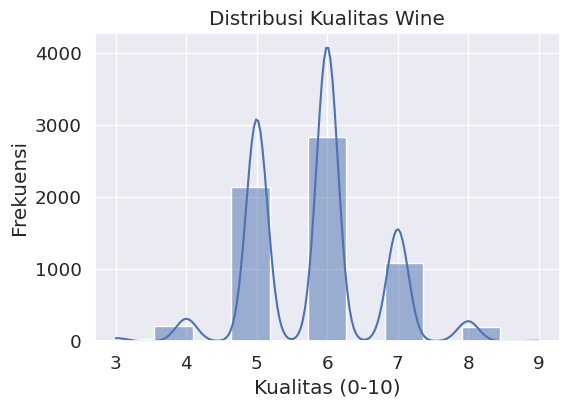

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='quality', bins=11, kde=True)
plt.title('Distribusi Kualitas Wine')
plt.xlabel('Kualitas (0-10)')
plt.ylabel('Frekuensi')
plt.show()

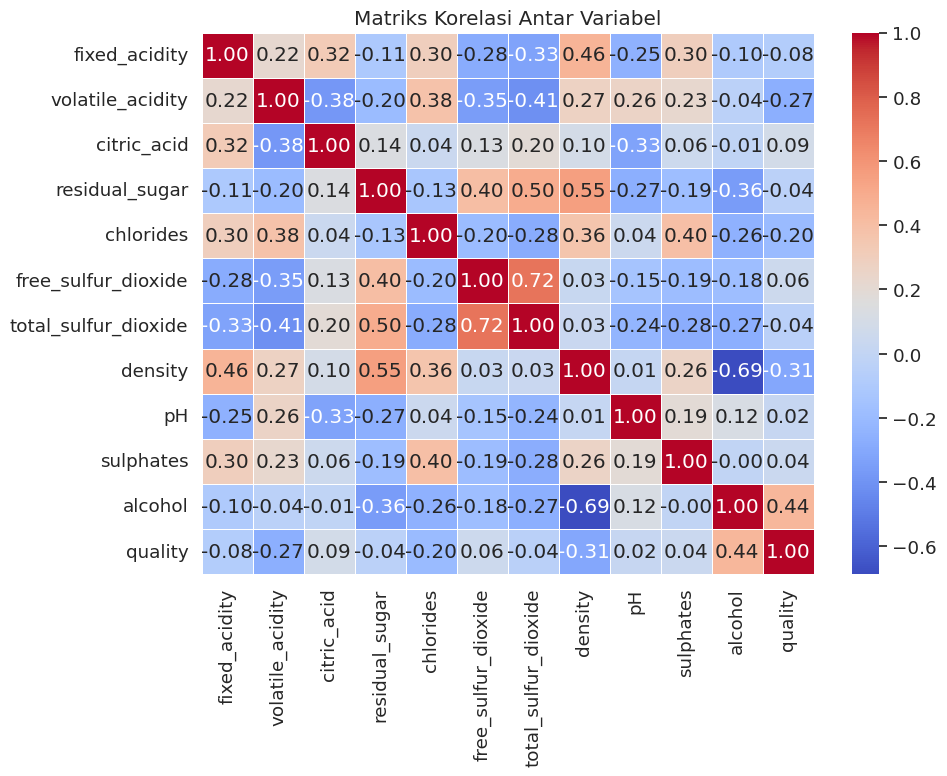

In [23]:
# Korelasi antar variabel
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Matriks Korelasi Antar Variabel')
plt.tight_layout()
plt.show()

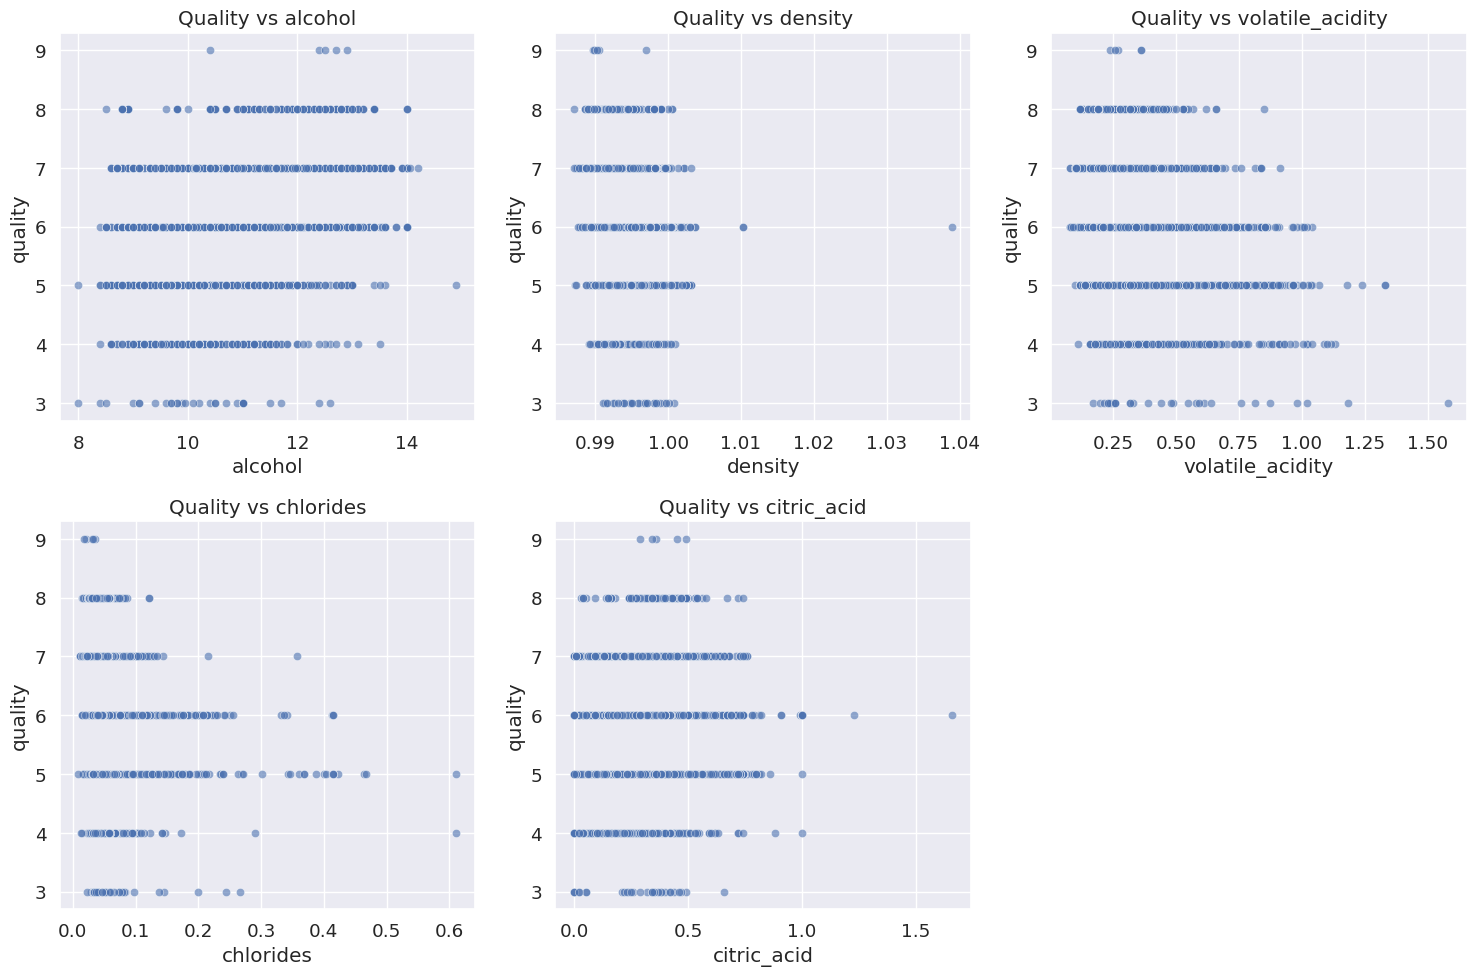

In [24]:
quality_correlation = correlation_matrix['quality'].drop('quality').abs().sort_values(ascending=False)
top_features = quality_correlation.nlargest(5).index

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='quality', data=data, alpha=0.6)
    plt.title(f'Quality vs {feature}')
    plt.tight_layout()
plt.show()

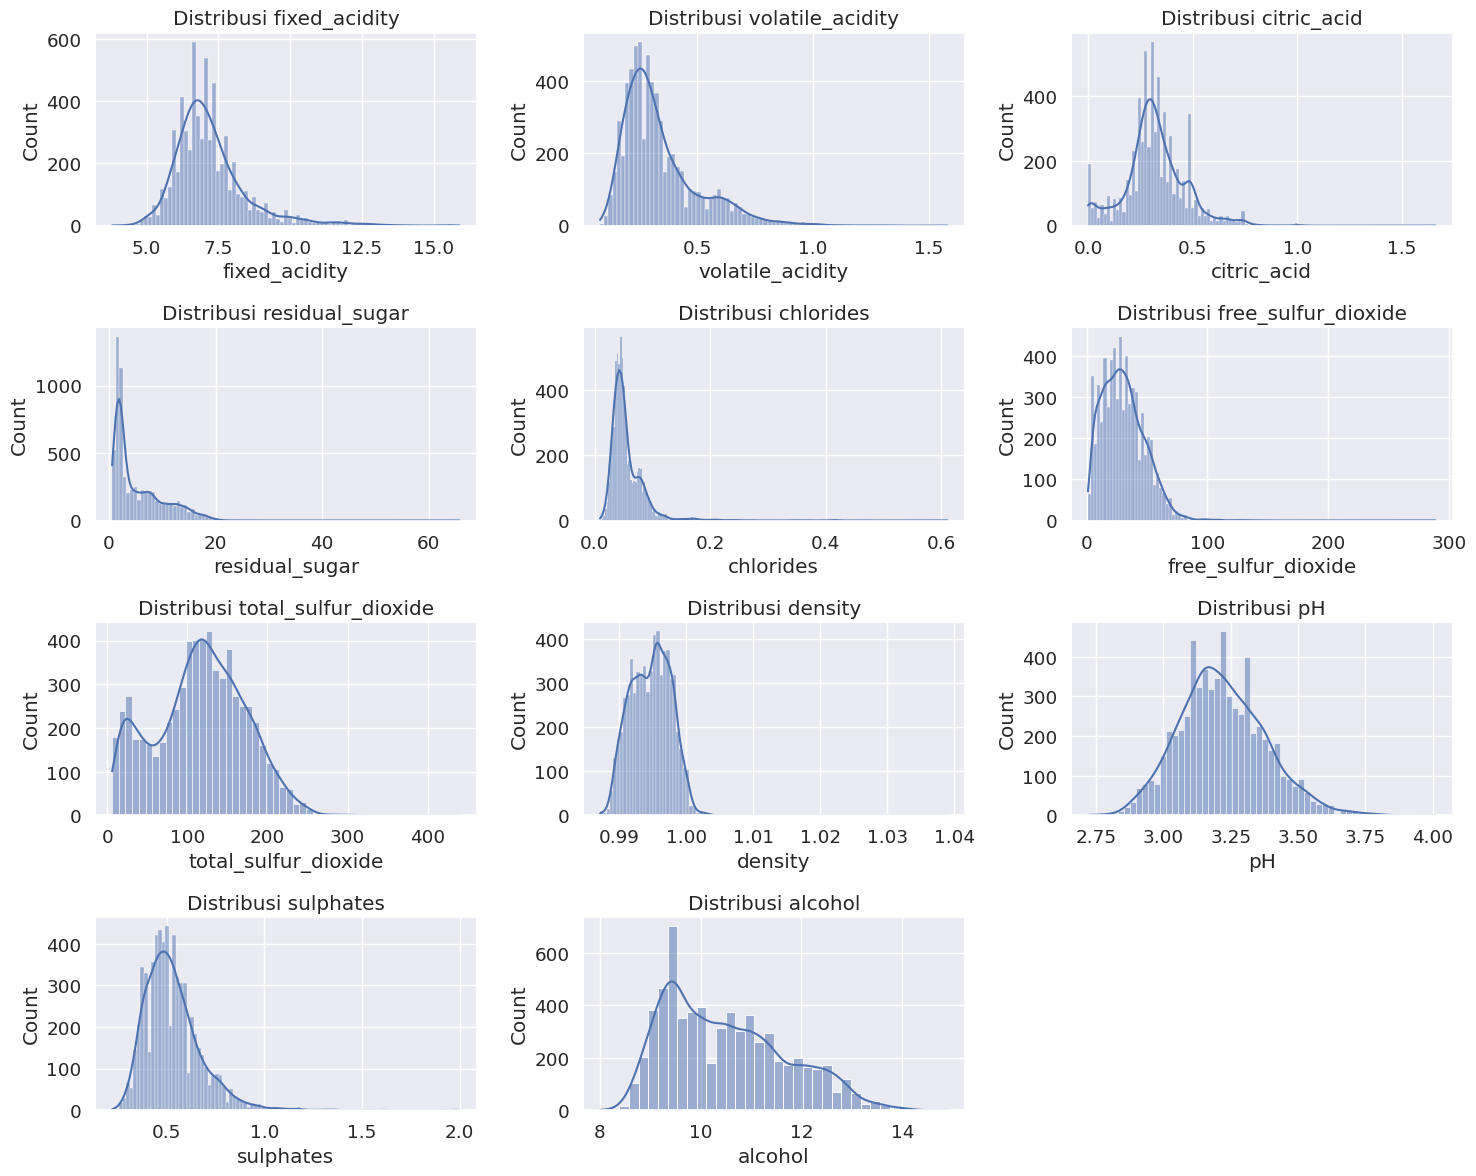

In [25]:
# Distribusi fitur-fitur numerik
plt.figure(figsize=(15, 12))
for i, column in enumerate(X.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

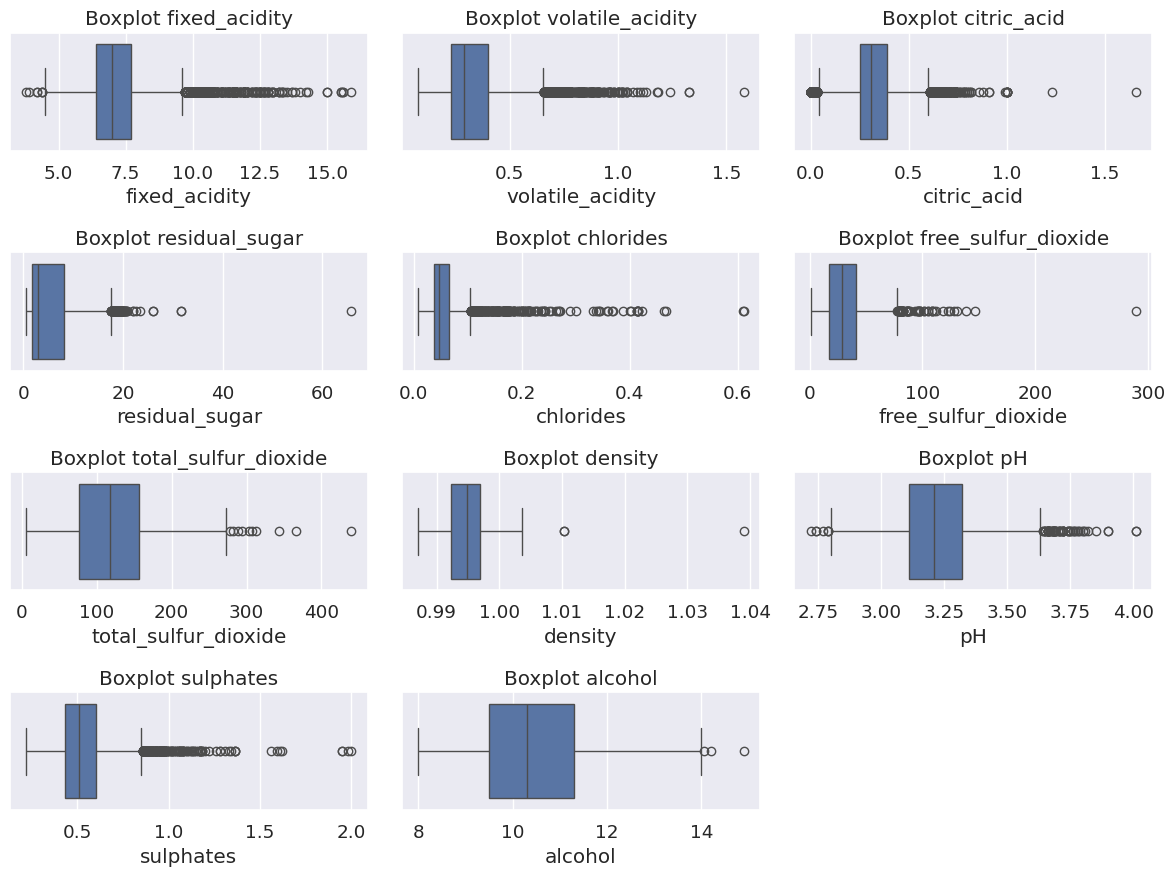

In [27]:
# Boxplot untuk deteksi outlier
plt.figure(figsize=(12, 9))
for i, column in enumerate(X.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=X[column])
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

<Figure size 1500x1200 with 0 Axes>

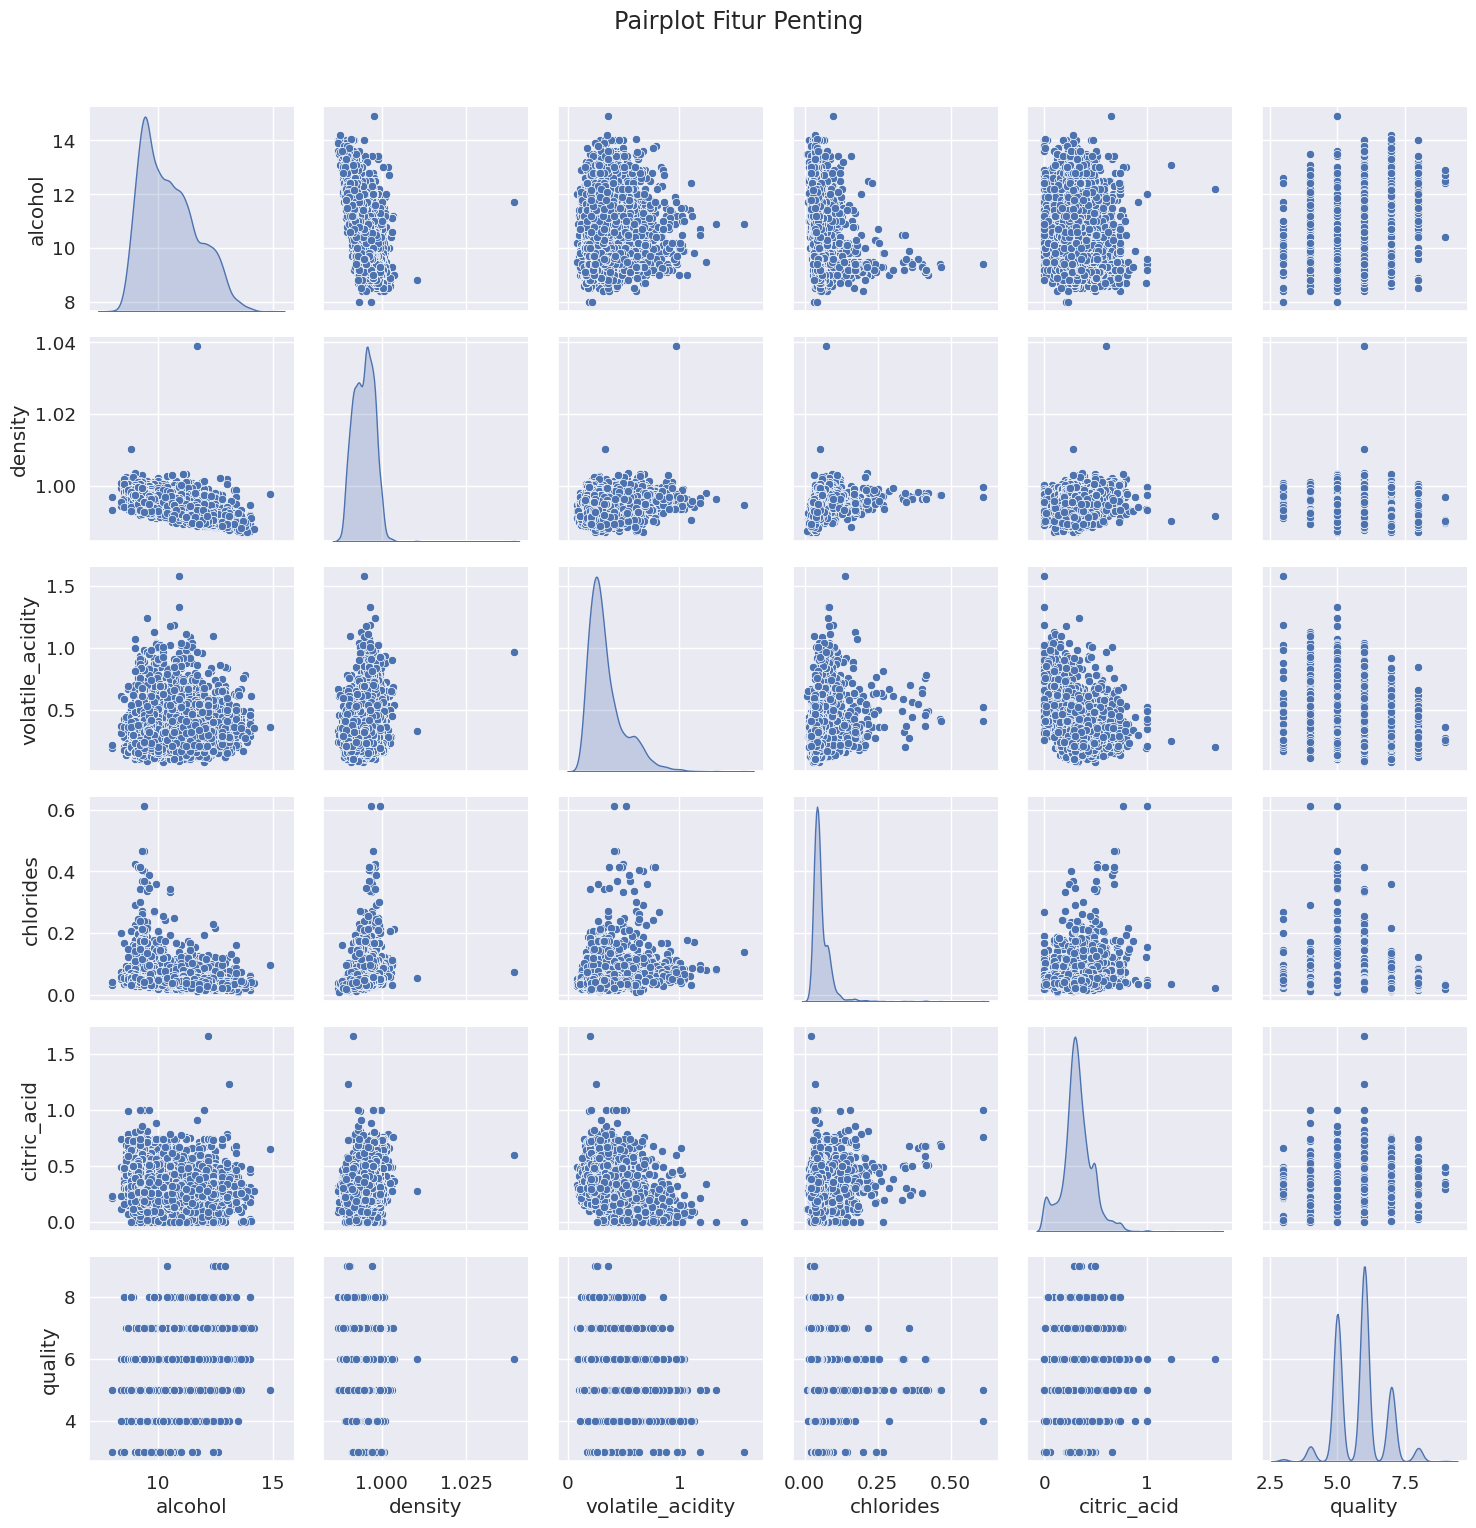

In [28]:
# Pairplot untuk fitur-fitur penting
plt.figure(figsize=(15, 12))
sns.pairplot(data[list(top_features) + ['quality']], diag_kind='kde')
plt.suptitle('Pairplot Fitur Penting', y=1.02)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kamu menggunakan data tidak terstruktur.

In [34]:
print("\n---- Penanganan Missing Values ----")
if data.isnull().sum().sum() > 0:
    # Jika ada nilai yang hilang, gunakan imputasi median
    imputer = SimpleImputer(strategy='median')
    data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    print("Missing values telah diisi dengan nilai median")
else:
    data_imputed = data.copy()
    print("Tidak ada missing values pada dataset")


---- Penanganan Missing Values ----
Tidak ada missing values pada dataset


In [39]:
print("\n---- Deteksi dan Penanganan Outlier ----")
def handle_outliers(df, columns):
    df_clean = df.copy()
    outlier_count = 0

    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)].shape[0]
        outlier_count += outliers

        print(f"Jumlah outlier pada '{column}': {outliers}")

        # Capping outlier dengan batas bawah dan batas atas
        df_clean[column] = np.where(df_clean[column] < lower_bound, lower_bound, df_clean[column])
        df_clean[column] = np.where(df_clean[column] > upper_bound, upper_bound, df_clean[column])

    print(f"\nTotal outlier yang ditangani: {outlier_count}")
    return df_clean

data_cleaned = handle_outliers(data_imputed, X.columns)


---- Deteksi dan Penanganan Outlier ----
Jumlah outlier pada 'fixed_acidity': 357
Jumlah outlier pada 'volatile_acidity': 377
Jumlah outlier pada 'citric_acid': 509
Jumlah outlier pada 'residual_sugar': 118
Jumlah outlier pada 'chlorides': 286
Jumlah outlier pada 'free_sulfur_dioxide': 62
Jumlah outlier pada 'total_sulfur_dioxide': 10
Jumlah outlier pada 'density': 3
Jumlah outlier pada 'pH': 73
Jumlah outlier pada 'sulphates': 191
Jumlah outlier pada 'alcohol': 3

Total outlier yang ditangani: 1989


In [40]:
print("\n---- Normalisasi/Standardisasi Data ----")
# Pisahkan kembali fitur dan target setelah preprocessing
X_cleaned = data_cleaned.drop('quality', axis=1)
y_cleaned = data_cleaned['quality']

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_cleaned), columns=X_cleaned.columns)
print("Data telah distandarisasi")


---- Normalisasi/Standardisasi Data ----
Data telah distandarisasi


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned,
                                                   test_size=0.2,
                                                   random_state=42)

print("\n---- Train-Test Split ----")
print(f"Jumlah data train: {X_train.shape[0]} sampel")
print(f"Jumlah data test: {X_test.shape[0]} sampel")


---- Train-Test Split ----
Jumlah data train: 5197 sampel
Jumlah data test: 1300 sampel


In [42]:
print("\n---- Menyimpan Data Hasil Preprocessing ----")

if not os.path.exists('winequality_preprocessing'):
    os.makedirs('winequality_preprocessing')

# Menggabungkan fitur yang sudah diproses dan target untuk disimpan
train_data = pd.concat([pd.DataFrame(X_train, columns=X_cleaned.columns),
                        pd.DataFrame(y_train, columns=['quality'])], axis=1)
test_data = pd.concat([pd.DataFrame(X_test, columns=X_cleaned.columns),
                       pd.DataFrame(y_test, columns=['quality'])], axis=1)

# Menyimpan data train dan test
train_data.to_csv('winequality_preprocessing/train_data.csv', index=False)
test_data.to_csv('winequality_preprocessing/test_data.csv', index=False)

# Menyimpan scaler untuk digunakan nanti
import joblib
joblib.dump(scaler, 'winequality_preprocessing/scaler.pkl')

print("Data hasil preprocessing telah disimpan ke direktori 'winequality_preprocessing'")


---- Menyimpan Data Hasil Preprocessing ----
Data hasil preprocessing telah disimpan ke direktori 'winequality_preprocessing'


In [44]:
print("\n---- Model Sederhana untuk Validasi ----")
# Membuat dan melatih model Random Forest sebagai contoh
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Melakukan prediksi pada data test
y_pred = model.predict(X_test)

# Evaluasi performa model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


---- Model Sederhana untuk Validasi ----
Mean Squared Error (MSE): 0.3716
Root Mean Squared Error (RMSE): 0.6096
Mean Absolute Error (MAE): 0.4385
R-squared (R²): 0.4969


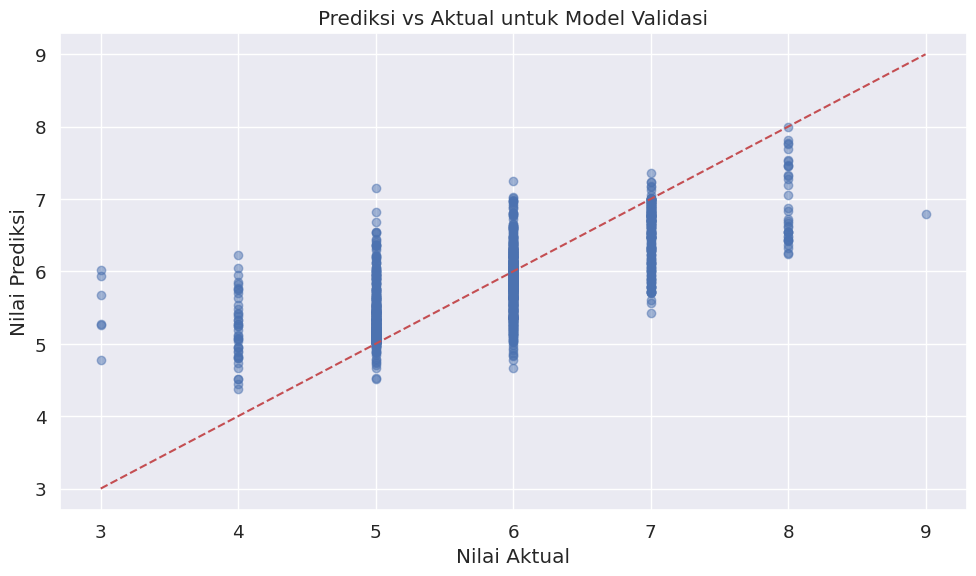

In [45]:
# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi vs Aktual untuk Model Validasi')
plt.tight_layout()
plt.show()

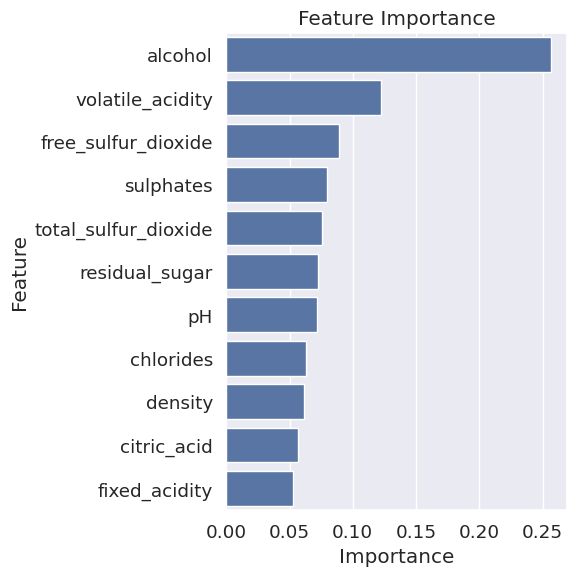

In [49]:
plt.figure(figsize=(6, 6))
feature_importance = pd.DataFrame({
    'Feature': X_cleaned.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [50]:
print("\n---- Fitur Terpenting ----")
print(feature_importance)


---- Fitur Terpenting ----
                 Feature  Importance
10               alcohol    0.256330
1       volatile_acidity    0.122087
5    free_sulfur_dioxide    0.089225
9              sulphates    0.079573
6   total_sulfur_dioxide    0.075741
3         residual_sugar    0.072189
8                     pH    0.071555
4              chlorides    0.062881
7                density    0.061123
2            citric_acid    0.056362
0          fixed_acidity    0.052934


### **Preprocessing Selesai**
Dataset telah berhasil diproses dan siap digunakan untuk pelatihan model